In [4]:
pip install tensorflow



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [8]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
     

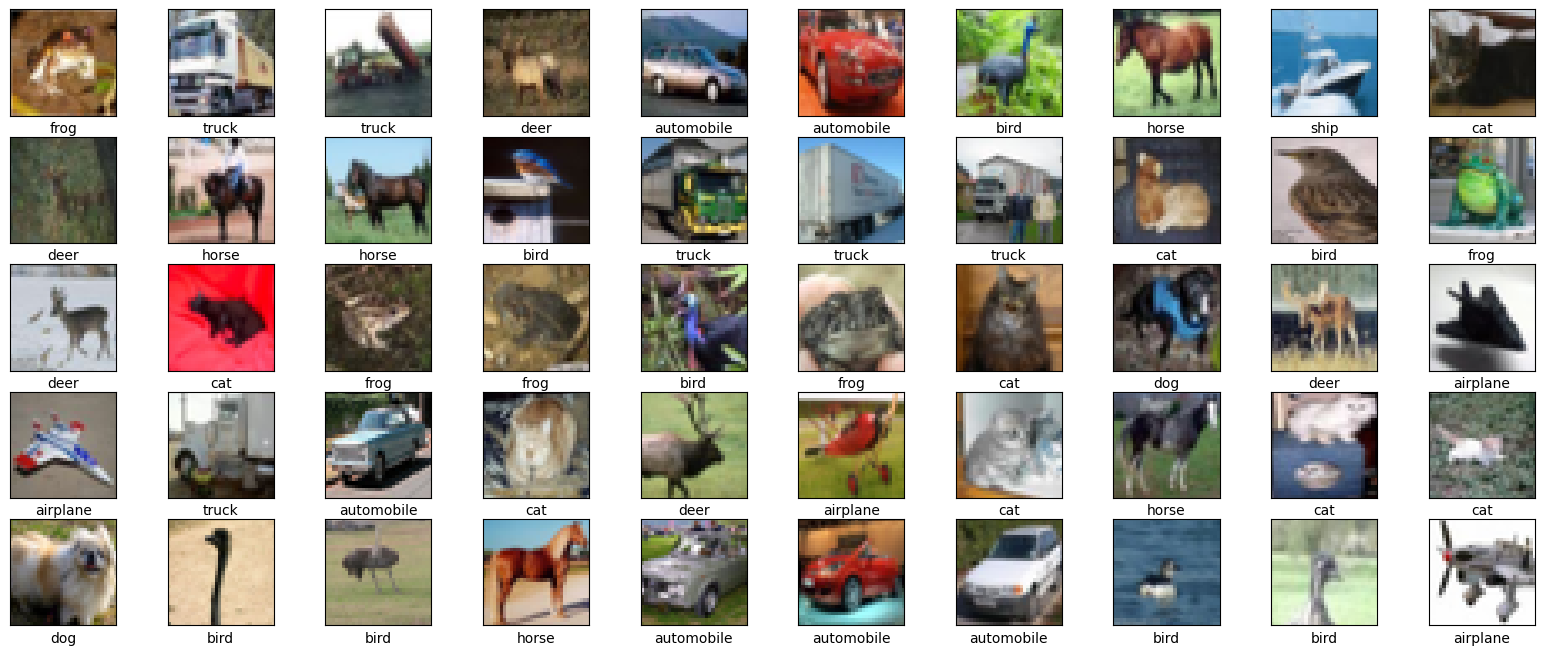

In [9]:


plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [10]:

X_train, X_test = X_train / 255.0, X_test / 255.0

In [11]:
model = keras.Sequential([

    keras.Input(shape=(32,32,3)),


    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),


    layers.Dense(10, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)         

In [13]:
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:

h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10


1250/1250 [==============================] - 36s 22ms/step - loss: 1.6751 - accuracy: 0.3916 - val_loss: 1.3869 - val_accuracy: 0.4989
Epoch 2/10
1250/1250 [==============================] - 26s 21ms/step - loss: 1.3070 - accuracy: 0.5356 - val_loss: 1.2058 - val_accuracy: 0.5728
Epoch 3/10
1250/1250 [==============================] - 27s 22ms/step - loss: 1.1560 - accuracy: 0.5943 - val_loss: 1.1532 - val_accuracy: 0.5850
Epoch 4/10
1250/1250 [==============================] - 26s 21ms/step - loss: 1.0418 - accuracy: 0.6351 - val_loss: 1.1150 - val_accuracy: 0.6158
Epoch 5/10
1250/1250 [==============================] - 26s 21ms/step - loss: 0.9590 - accuracy: 0.6636 - val_loss: 1.1282 - val_accuracy: 0.6183
Epoch 6/10
1250/1250 [==============================] - 27s 22ms/step - loss: 0.8926 - accuracy: 0.6873 - val_loss: 1.0043 - val_accuracy: 0.6612
Epoch 7/10
1250/1250 [==============================] - 27s 21ms/step - loss: 0.8377 - accuracy: 0.7091 - val_loss: 1.0881

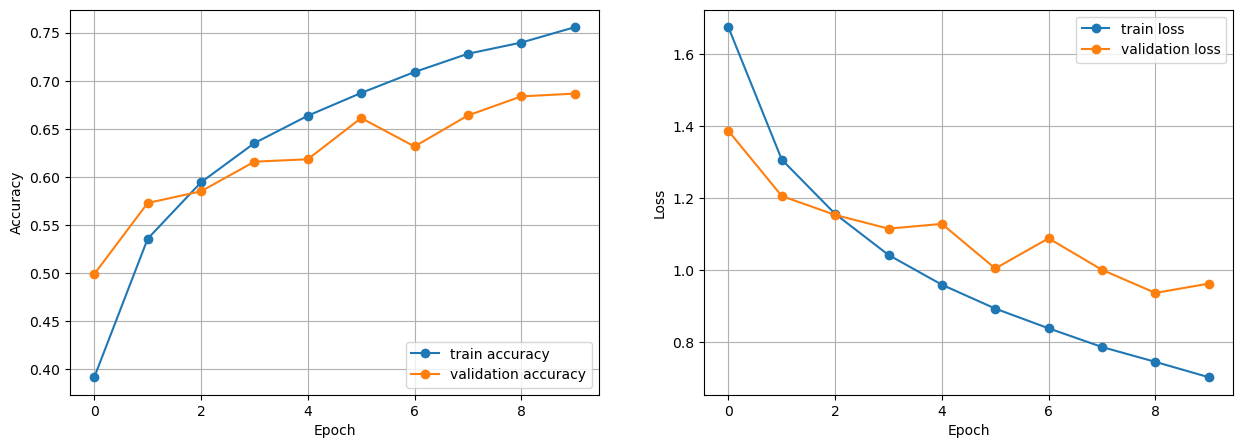

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [16]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 7s 7ms/step - loss: 0.9826 - accuracy: 0.6807

Test Accuracy: 0.6807000041007996

Test Loss: 0.9826259016990662


In [17]:

predictions = model.predict(X_test)

313/313 [==============================] - 7s 7ms/step


In [18]:

predictions[0]
     

array([0.00258572, 0.0119401 , 0.01294618, 0.45201054, 0.00134135,
       0.43587947, 0.01467805, 0.00361041, 0.0530525 , 0.01195566],
      dtype=float32)

In [19]:
np.argmax(predictions[0])

3

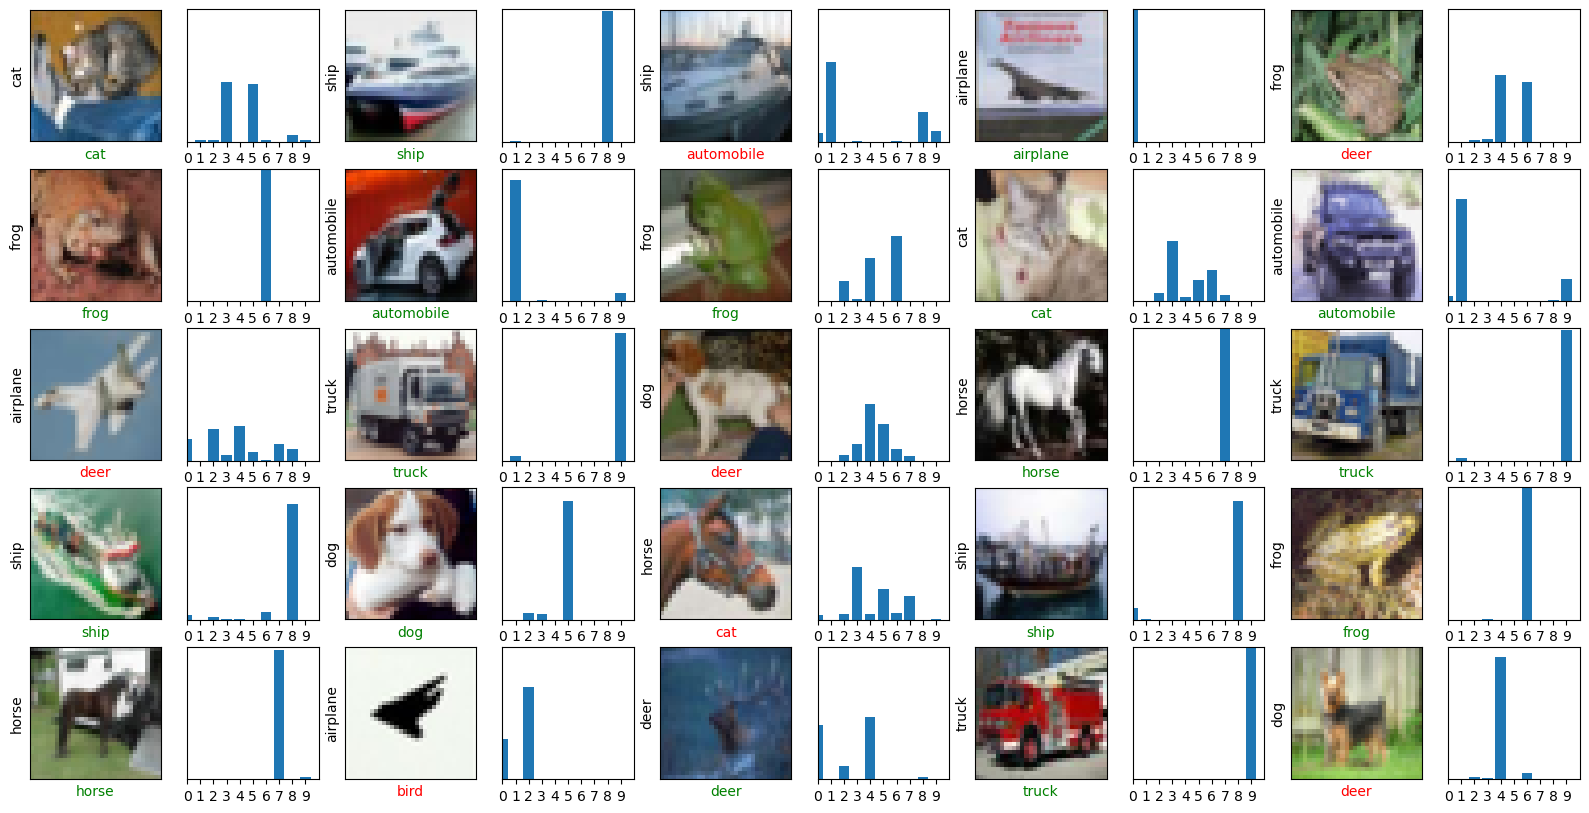

In [20]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

# RMSprop Optimizer
RMSprop is a dynamic optimization algorithm that fine-tunes the learning rate for each parameter by considering the square root of the exponentially weighted moving average of squared gradients.

# Key Parameters:
Learning Rate: Similar to Adam, RMSprop uses an adaptable learning rate that adjusts based on historical gradients.

Learning Rate Schedule: It can utilize a consistent learning rate or incorporate a strategy for learning rate decay over time.

Momentum: In contrast to certain optimization algorithms, RMSprop doesn't incorporate momentum. Instead, it observes the exponentially weighted moving average of squared gradients.

Weight Decay: Similar to Adam and SGD, RMSprop offers optional support for L2 regularization through weight decay.

In [22]:
model.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
     


In [23]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 41s 27ms/step - loss: 0.6748 - accuracy: 0.7648 - val_loss: 0.9726 - val_accuracy: 0.6793
Epoch 2/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.6342 - accuracy: 0.7810 - val_loss: 0.9908 - val_accuracy: 0.6967
Epoch 3/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.6099 - accuracy: 0.7864 - val_loss: 0.9979 - val_accuracy: 0.6951
Epoch 4/10
1250/1250 [==============================] - 29s 23ms/step - loss: 0.5864 - accuracy: 0.7955 - val_loss: 1.0053 - val_accuracy: 0.6915
Epoch 5/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.5614 - accuracy: 0.8052 - val_loss: 1.1983 - val_accuracy: 0.6833
Epoch 6/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.5431 - accuracy: 0.8107 - val_loss: 1.1020 - val_accuracy: 0.6977
Epoch 7/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.5264 - accuracy: 0.8178 - val_loss: 1.0682 -

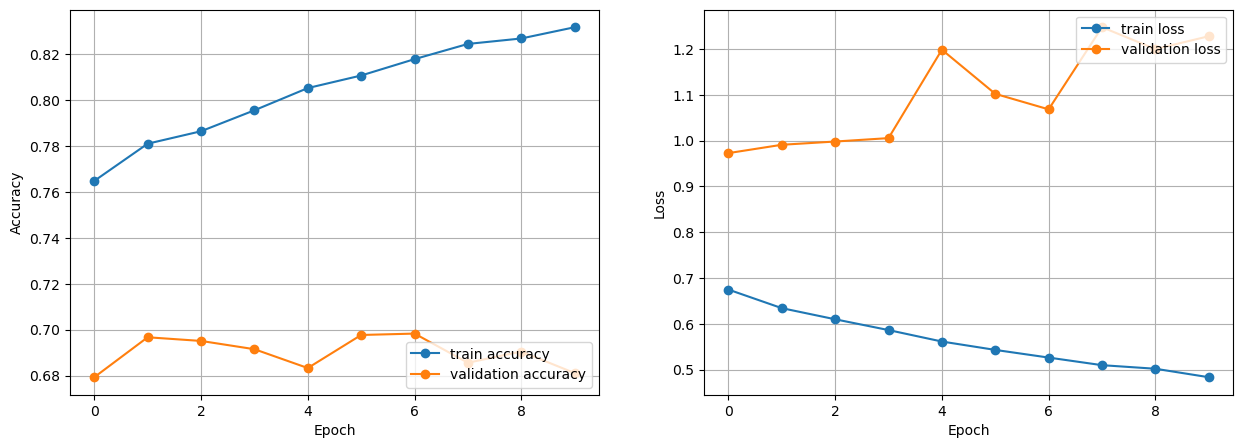

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [25]:

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 8s 8ms/step - loss: 1.2535 - accuracy: 0.6701

Test Accuracy: 0.6700999736785889

Test Loss: 1.2535319328308105


SGD OPTIMIZER:
Stochastic Gradient Descent (SGD) serves as the fundamental optimization algorithm, updating model parameters based on the gradients of the loss function with respect to each parameter and maintaining a constant learning rate.
PARAMETERS:
Learning Rate Consistency: SGD applies a consistent learning rate to all parameters throughout the training process.

Learning Rate Schedule: While it doesn't inherently incorporate adaptive learning rate schedules, users can manually introduce learning rate decay over time if desired.

Momentum: SGD includes a momentum feature, which introduces an additional parameter to control the influence of the previous gradient direction on the current parameter update.

Weight Decay: Similar to Adam, SGD allows for optional L2 regularization, facilitating weight decay as needed.


In [26]:

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:

h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 39s 25ms/step - loss: 0.4158 - accuracy: 0.8540 - val_loss: 1.2752 - val_accuracy: 0.7039
Epoch 2/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.3361 - accuracy: 0.8828 - val_loss: 1.3299 - val_accuracy: 0.6958
Epoch 3/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.3035 - accuracy: 0.8946 - val_loss: 1.3833 - val_accuracy: 0.6976
Epoch 4/10
1250/1250 [==============================] - 29s 24ms/step - loss: 0.2761 - accuracy: 0.9030 - val_loss: 1.3485 - val_accuracy: 0.6897
Epoch 5/10
1250/1250 [==============================] - 29s 24ms/step - loss: 0.2550 - accuracy: 0.9085 - val_loss: 1.5431 - val_accuracy: 0.6955
Epoch 6/10
1250/1250 [==============================] - 28s 23ms/step - loss: 0.2408 - accuracy: 0.9142 - val_loss: 1.5120 - val_accuracy: 0.7005
Epoch 7/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.2240 - accuracy: 0.9204 - val_loss: 1.5011 -

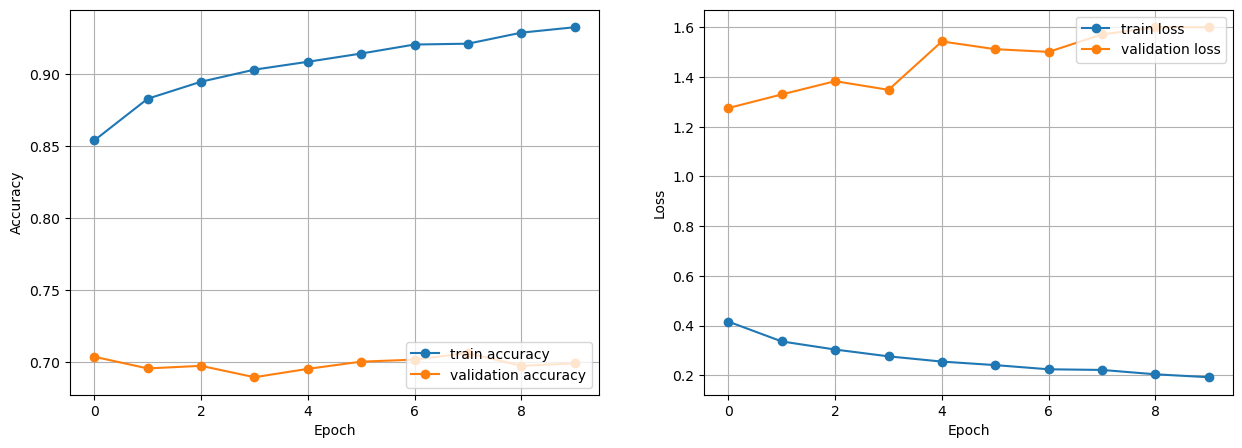

In [28]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [29]:

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 7s 7ms/step - loss: 1.6176 - accuracy: 0.6909

Test Accuracy: 0.6909000277519226

Test Loss: 1.6176093816757202


#Adam – Optimizer

Adam is a widely employed optimization algorithm that combines the advantages of RMSprop and momentum-based methods. It dynamically adjusts the learning rate for each parameter and employs exponential moving averages of gradients for weight updates.

Adam features an adaptive learning rate, dynamically modifying it based on historical gradients for each parameter. It supports a time-based learning rate schedule and provides customization options. Unlike standard stochastic gradient descent (SGD), Adam doesn't rely on traditional momentum. Instead, it calculates adaptive learning rates using first and second moments. Similar to RMSprop and SGD, Adam also allows for optional L2 regularization, applying penalties to significant parameter values to mitigate overfitting.


In [30]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 38s 24ms/step - loss: 0.3994 - accuracy: 0.8598 - val_loss: 1.4942 - val_accuracy: 0.6851
Epoch 2/10
1250/1250 [==============================] - 29s 23ms/step - loss: 0.3812 - accuracy: 0.8651 - val_loss: 1.4639 - val_accuracy: 0.6869
Epoch 3/10
1250/1250 [==============================] - 33s 27ms/step - loss: 0.3648 - accuracy: 0.8711 - val_loss: 1.4187 - val_accuracy: 0.6776
Epoch 4/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.3465 - accuracy: 0.8767 - val_loss: 1.5177 - val_accuracy: 0.6838
Epoch 5/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.3385 - accuracy: 0.8795 - val_loss: 1.3944 - val_accuracy: 0.6697
Epoch 6/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.3176 - accuracy: 0.8860 - val_loss: 1.5346 - val_accuracy: 0.6834
Epoch 7/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.3106 - accuracy: 0.8899 - val_loss: 1.5605 -

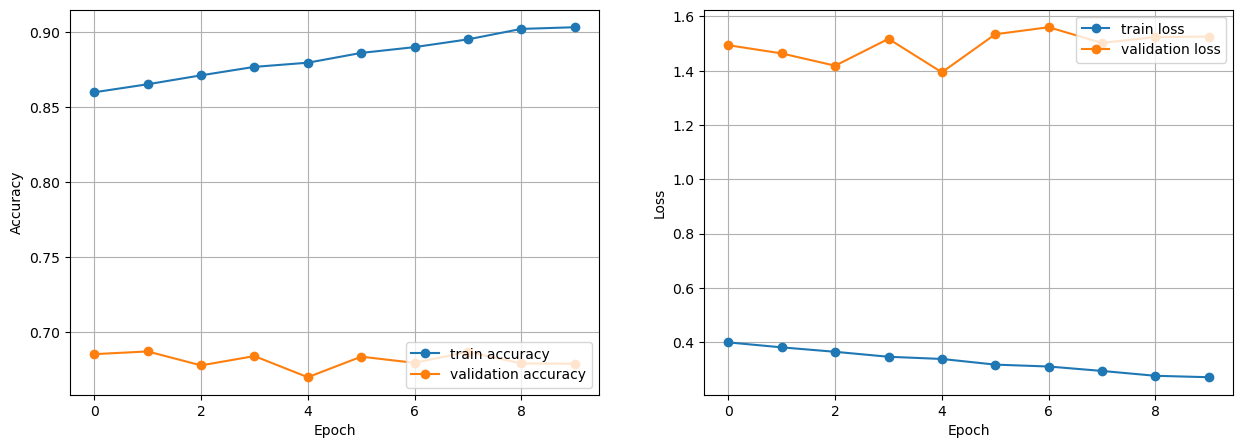

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()
     

In [33]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 8s 8ms/step - loss: 1.5371 - accuracy: 0.6719

Test Accuracy: 0.6718999743461609

Test Loss: 1.5371159315109253
